# Happiness Report Analysis

#### The report will answer certain questions that can be drawn out from the data, and will try to find the relations of different factors in the best, avg and worst performing countries to see how to correlates to its happiness index using statistical modeling.

### Importing relevant libraries

In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the raw data

In [51]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('2020.csv')

# Let's explore the top 5 rows of the df
raw_data

,Rank,CountryName,Region,Score,Gdp_Per_Capita,Soc_Support,Health_life_expectancy,Freedom_of_choice,Generosity,Percept_of_corrupt
0,1,Finland,Western Europe,7.8087,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445
1,2,Denmark,Western Europe,7.6456,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489
2,3,Switzerland,Western Europe,7.5599,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728
3,4,Iceland,Western Europe,7.5045,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710
4,5,Norway,Western Europe,7.4880,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218
...,...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,Sub-Saharan Africa,3.4759,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807
149,150,Rwanda,Sub-Saharan Africa,3.3123,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541
150,151,Zimbabwe,Sub-Saharan Africa,3.2992,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237
151,152,South Sudan,Sub-Saharan Africa,2.8166,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417


### Preprocessing

### Exploring the descriptive statistics of the data

In [6]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe()

# Note that categorical variables don't have some types of numerical descriptives
# and numerical variables don't have some types of categorical descriptives

,Rank,Score,Gdp_Per_Capita,Soc_Support,Health_life_expectancy,Freedom_of_choice,Generosity,Percept_of_corrupt
count,153.000000,153.00000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,5.47324,9.295706,0.808721,64.445529,0.783360,-0.014568,0.733120
std,44.311398,1.11227,1.201588,0.121453,7.057848,0.117786,0.151809,0.175172
min,1.000000,2.56690,6.492642,0.319460,45.200001,0.396573,-0.300907,0.109784
25%,39.000000,4.72410,8.350645,0.737217,58.961712,0.714839,-0.127015,0.683019
50%,77.000000,5.51500,9.456313,0.829204,66.305145,0.799805,-0.033665,0.783122
75%,115.000000,6.22850,10.265124,0.906747,69.289192,0.877709,0.085429,0.849151
max,153.000000,7.80870,11.450681,0.974670,76.804581,0.974998,0.560664,0.935585


In [8]:
## general correlation test
## values range from -1 to 1
## a positive value denotes that both the values have a direct relationship where as
## a negative value denotes a inverse relationship
raw_data.corr(method='pearson')

,Rank,Score,Gdp_Per_Capita,Soc_Support,Health_life_expectancy,Freedom_of_choice,Generosity,Percept_of_corrupt
Rank,1.000000,-0.985263,-0.777302,-0.749488,-0.769746,-0.583441,-0.044922,0.394355
Score,-0.985263,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043,-0.418305
Gdp_Per_Capita,-0.777302,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399,-0.334729
Soc_Support,-0.749488,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780,-0.210530
Health_life_expectancy,-0.769746,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852,-0.353841
Freedom_of_choice,-0.583441,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721,-0.420145
Generosity,-0.044922,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000,-0.278480
Percept_of_corrupt,0.394355,-0.418305,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,1.000000


##### the data above shows a general correlation table using the pearson correlation formula, but this data is recommended to get the best answer out of this report. There might be outliers, nonlinear values which we will further detail out using other statistical functions.

### Dealing with missing values

In [11]:
## for the preprocessing (data cleaning) purposes, its required to check for any empty values to
## avoid wrong computations ahead in the regression analysis.
raw_data.isnull().sum()

Rank                      0
CountryName               0
Region                    0
Score                     0
Gdp_Per_Capita            0
Soc_Support               0
Health_life_expectancy    0
Freedom_of_choice         0
Generosity                0
Percept_of_corrupt        0
dtype: int64

## Questions to figure out from the data

###### This happiness report generates a score that is based off several parameters over which a country is analyzed about their happiness level. The questions below for analysis are taking some of those parameters to visualize the pattern and see the differences between those countries, and providing us the insight of how those parameters are themselves effective in the happiness level of a certain country. The score breakdown is as follows:
###### National average of score (collected from data 2004-2019): 33% Social Support, 25% GDP per capita, 20% health life expectancy, 13% freedom of choice, 5% generosity, 4% percept of corruption 

### Question no. 1: Does having less percept_of_corrupt helps with the predicted score of the country?

In [25]:
# Although the percept of corrupt contributes to only 4% of the total average score, we will try to find out how it
# still effects in the rankings and how does a country's happiness score relates to it corruption perspective.

# Using regression analysis, we can understand the correlation between the dependent variable 'score' and the
# independent variable percept_of_corrupt

x1 = raw_data['Percept_of_corrupt']
y = raw_data['Score']

##### exploring the data using scatterplot

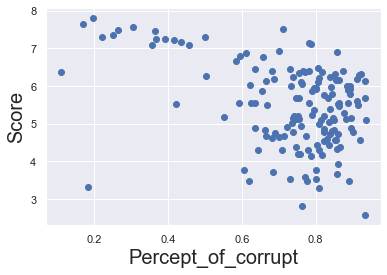

In [26]:
plt.scatter(x1,y)
plt.xlabel('Percept_of_corrupt',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.show()

##### Using regression

In [35]:
# using sklearn to fit the data
reg = LinearRegression()
x = np.array(raw_data['Percept_of_corrupt'])
x = np.matrix(x).T.A
reg.fit(x,y)

# using statsmodel to list the summary of the data
modelX = sm.add_constant(x)
model = sm.OLS(y,modelX).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     32.03
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           7.43e-08
Time:                        18:03:06   Log-Likelihood:                -218.16
No. Observations:                 153   AIC:                             440.3
Df Residuals:                     151   BIC:                             446.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4205      0.354     20.979      0.000       6.722       8.119
x1            -2.6561      0.469     -5.659      0.000      -3.583      -1.729
==============================================================================
Omnibus:                       10.972   Durbin-Watson:                   0.253
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.400
Skew:                          -0.659   Prob(JB):                      0.00335
Kurtosis:                       3.225   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

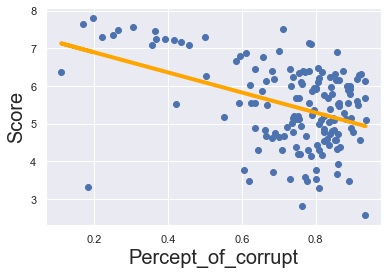

In [39]:
# creating the regression plot
plt.scatter(x,y)
yhat = -2.6561*x + 7.4205
fig = plt.plot(x,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('Percept_of_corrupt', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.show()

In [120]:
# using some random good, moderate and worst values for percept_of_corrupt ((0, 1) whereas 0 indicates less corruption
# and 1 indicates more corruption ) to predict the happiness scores

new_data = pd.DataFrame({'const':1,'Percept_of_corrupt':[0.13, 0.42, 0.93]})
new_data = new_data[['const','Percept_of_corrupt']]
new_data.rename(index={0:'Good', 1:'Moderate', 2:'Worst'})

# predicting the score
predictions = model.predict(new_data)
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename({0:'Good',1:'Moderate', 2: 'Worst'})

,const,Percept_of_corrupt,Predictions
Good,1,0.13,7.075163
Moderate,1,0.42,6.304906
Worst,1,0.93,4.950316


In [140]:
# using the actual best, worst and median value from the actual dataset to compare the result
idmax = pd.DataFrame(raw_data.iloc[raw_data['Percept_of_corrupt'].idxmax()]).transpose()
idmin = pd.DataFrame(raw_data.iloc[raw_data['Percept_of_corrupt'].idxmin()]).transpose()
idmed = pd.DataFrame(raw_data.iloc[int(len(raw_data)/2)]).transpose()

actData = [idmax, idmin, idmed]
act_data = pd.concat(actData).drop(["Rank", "CountryName", "Region", "Gdp_Per_Capita", "Soc_Support", "Health_life_expectancy", "Freedom_of_choice", "Generosity"], axis=1)
Valtype = ["Best", "Worst", "Moderate"]
act_data['Valtype'] = Valtype
act_data = act_data[['Valtype','Percept_of_corrupt', 'Score']]
act_data.reset_index(drop=True, inplace=True)
#act_data.rename({0:'Best', 1:'Worst', 2:'Moderate'})
act_data

,Valtype,Percept_of_corrupt,Score
0,Best,0.935585,5.1015
1,Worst,0.109784,6.3771
2,Moderate,0.859931,5.515


##### Based on the above analysis, it's evident that having less amount of corruption can lead to a happier lifestyle and a better happiness score. Also the regression plot is showing that the percept_of_corrupt only contributes 4% to the total avg score as the values are still scatter across the plot but the few outliers of less corrupt countries are getting the better scores is still visible with a lot of countries pooled around increased corrupt perception values. 